Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [660]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [661]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
#Reading gender file:
gender_file = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/gender_submission.csv')

In [662]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [663]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [664]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [665]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [666]:
gender_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Check for null values and correct

In [667]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Fill null values with mode

In [668]:
train["Age"] = train["Age"].fillna(train['Age'].median())
train["Fare"] = train["Fare"].fillna(train['Fare'].median())
train["Cabin"] = train["Cabin"].fillna(train['Cabin'].mode()[0])
train["Embarked"] = train["Embarked"].fillna(train['Embarked'].mode()[0])

test["Age"] = test["Age"].fillna(test['Age'].median())
test["Fare"] = test["Fare"].fillna(test['Fare'].median())
test["Cabin"] = test["Cabin"].fillna(test['Cabin'].mode()[0])
test["Embarked"] = test["Embarked"].fillna(test['Embarked'].mode()[0])

Graphical representation of target

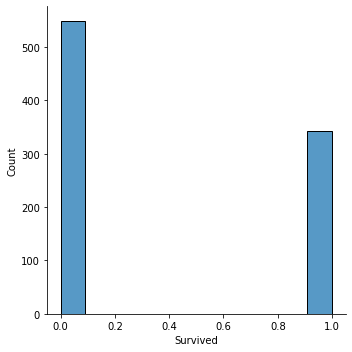

In [669]:
sns.displot(train.Survived)

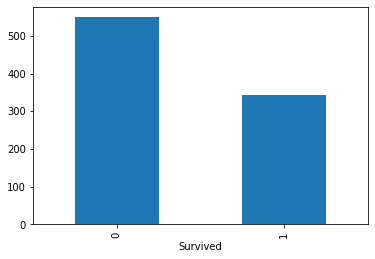

In [670]:
train.groupby('Survived').Survived.count().plot.bar(ylim=0)
plt.show()

Preprocess data

In [671]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

train.Sex = enc.fit_transform(train.Sex.values.reshape(-1,1))
train.Age=train.Age.astype(int)
train.Age = enc.fit_transform(train.Age.values.reshape(-1,1))
train.Ticket = enc.fit_transform(train.Ticket.values.reshape(-1,1))
train.Cabin = enc.fit_transform(train.Cabin.values.reshape(-1,1))
train.Fare=train.Fare.astype(int)
train.Fare = enc.fit_transform(train.Fare.values.reshape(-1,1))
train.Embarked = enc.fit_transform(train.Embarked.values.reshape(-1,1))

test.Sex = enc.fit_transform(test.Sex.values.reshape(-1,1))
test.Age=test.Age.astype(int)
test.Age = enc.fit_transform(test.Age.values.reshape(-1,1))
test.Ticket = enc.fit_transform(test.Ticket.values.reshape(-1,1))
test.Cabin = enc.fit_transform(test.Cabin.values.reshape(-1,1))
test.Fare=test.Fare.astype(int)
test.Fare = enc.fit_transform(test.Fare.values.reshape(-1,1))
test.Embarked = enc.fit_transform(test.Embarked.values.reshape(-1,1))

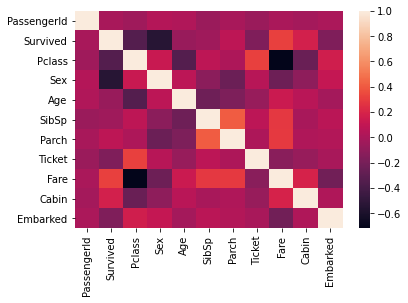

In [672]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap)

Set up X and y values

In [673]:
y = train.Survived
X = train.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
X.shape, y.shape,X_test.shape

((891, 7), (891,), (418, 7))

Scaler

In [674]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Scale the test set
X_test = scaler.transform(X_test)

In [675]:
X

array([[ 0.82737724,  0.73769513, -0.56630711, ..., -0.47367361,
        -0.77000505,  0.58595414],
       [-1.56610693, -1.35557354,  0.67287542, ..., -0.47367361,
         1.52264156, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25651148, ..., -0.47367361,
        -0.77000505,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.10161366, ...,  2.00893337,
        -0.06457532,  0.58595414],
       [-1.56610693,  0.73769513, -0.25651148, ..., -0.47367361,
         0.24405018, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20818197, ..., -0.47367361,
        -0.77000505, -0.67817453]])

In [676]:
np.mean(X),np.std(X)

(-1.9367045868080332e-17, 1.0)

In [677]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6']

In [678]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,0.827377,0.737695,-0.566307,0.432793,-0.473674,-0.770005,0.585954
1,-1.566107,-1.355574,0.672875,0.432793,-0.473674,1.522642,-1.942303
2,0.827377,-1.355574,-0.256511,-0.474545,-0.473674,-0.770005,0.585954
3,-1.566107,-1.355574,0.440529,0.432793,-0.473674,1.081748,0.585954
4,0.827377,0.737695,0.440529,-0.474545,-0.473674,-0.725916,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.179063,-0.474545,-0.473674,-0.505469,0.585954
887,-1.566107,-1.355574,-0.798654,-0.474545,-0.473674,0.244050,0.585954
888,0.827377,-1.355574,-0.101614,0.432793,2.008933,-0.064575,0.585954
889,-1.566107,0.737695,-0.256511,-0.474545,-0.473674,0.244050,-1.942303


In [679]:
from sklearn.decomposition import PCA

pca_titanic = PCA(n_components=2)
principalComponents_titanic = pca_titanic.fit_transform(X)

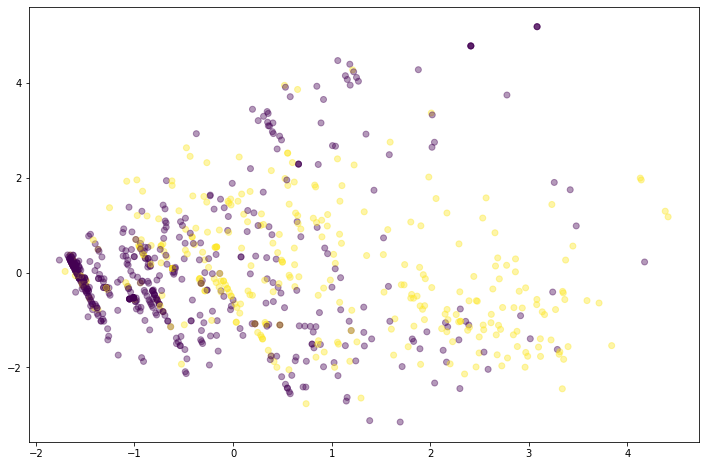

In [680]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_titanic[:, 0], principalComponents_titanic[:, 1], c = y, alpha = .4)

In [681]:

pca_titanic = PCA(n_components=7)

Split the training file for training and testing

In [682]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((801, 7), (90, 7), (801,), (90,))

Count values in validation set

In [683]:
from collections import Counter

print(Counter(y_val))

Counter({0: 55, 1: 35})


Class weights

In [684]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

Select model

Home made Logistic Regression

In [685]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [686]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [687]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
    return weights

In [688]:
xrange = range

weights = logistic_regression(X_train, y_train,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-550.7070372690476
-345.3356586289358
-345.3356586281172
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724
-345.33565862811724


Predict on training set

In [689]:
data_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)),X_train))
score = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(score))

print ('Accuracy from scratch: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.8027465667915106


Predict on validation set

In [690]:
data_with_intercept = np.hstack((np.ones((X_val.shape[0], 1)),X_val))
score = np.dot(data_with_intercept, weights)
y_pred = np.round(sigmoid(score))

print ('Accuracy from scratch: {0}'.format((y_pred == y_val).sum().astype(float) / len(y_pred)))

Accuracy from scratch: 0.7555555555555555


In [691]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[48  7]
 [15 20]]


In [692]:
print(Counter(y_val))

Counter({0: 55, 1: 35})


In [693]:
print(Counter(y_pred))

Counter({0.0: 63, 1.0: 27})


In [694]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
387,1,1.0
642,0,1.0
782,0,0.0
142,1,1.0
222,0,0.0
...,...,...
68,1,0.0
272,1,1.0
197,0,0.0
116,0,0.0


Plot errors

In [695]:
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

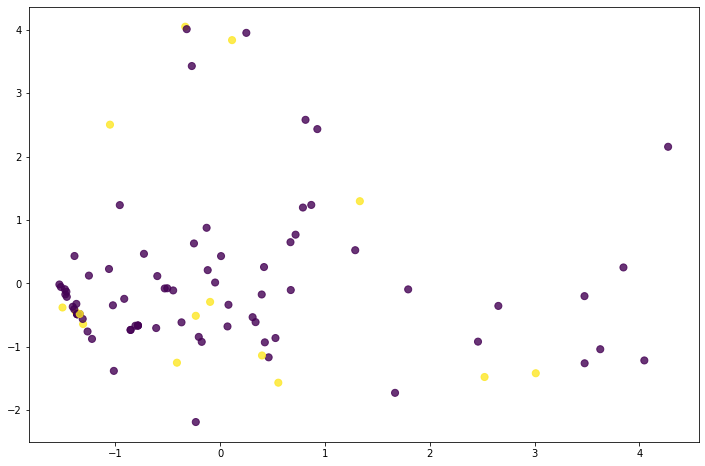

In [696]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)


Predict on test set

In [697]:
data_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
score = np.dot(data_with_intercept, weights)
predictions = np.round(sigmoid(score))

Prepare submission

In [698]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('hm_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Make submission

In [699]:
#upload submission
hm_submission = pd.read_csv("hm_submission.csv")
hm_submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


Logistic Regression from SK Learn

In [700]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1, max_iter=1000, class_weight=class_weights, C=10, solver='liblinear').fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7940074906367042


Predict on validation set

In [701]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.7222222222222222


In [702]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[45 10]
 [15 20]]


In [703]:
print(Counter(y_val))

Counter({0: 55, 1: 35})


In [704]:
print(Counter(y_pred))

Counter({0: 60, 1: 30})


In [705]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
387,1,1
642,0,1
782,0,1
142,1,1
222,0,0
...,...,...
68,1,0
272,1,1
197,0,0
116,0,0


Plot errors

In [706]:
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

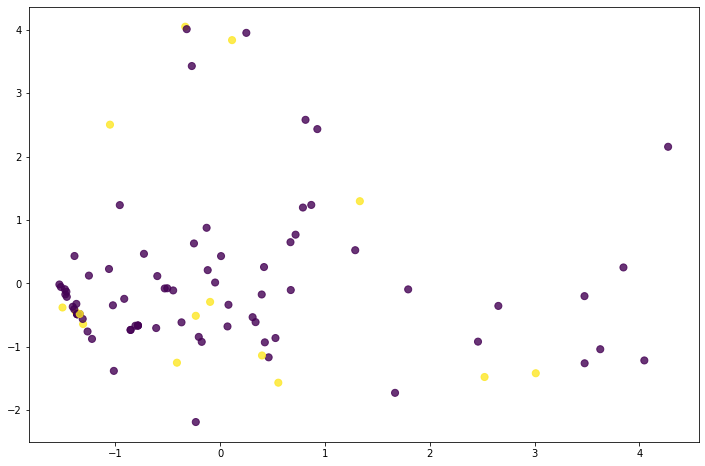

In [707]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)


Make predictions

In [708]:
predictions = model.predict(X_test)

In [709]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('sk_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submit predictions

In [710]:
#upload submission
sk_submission = pd.read_csv("sk_submission.csv")
sk_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Logistic Regression from Statsmodels

In [711]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.463195
         Iterations 6


In [712]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  801
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Dec 2020   Pseudo R-squ.:                  0.3041
Time:                        15:03:06   Log-Likelihood:                -371.02
converged:                       True   LL-Null:                       -533.18
Covariance Type:            nonrobust   LLR p-value:                 4.999e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6344      0.145     -4.387      0.000      -0.918      -0.351
x2            -1.3733      0.107    -12.853      0.000      -1.583      -1.164
x3            -0.5549      0.105     -5.271      0.0

In [713]:
yhat = logit.predict(X_val) 
pred = list(map(round, yhat)) 
pred = np.array(pred, dtype=np.int64)

In [714]:
from sklearn.metrics import (confusion_matrix, accuracy_score) 

print('Test accuracy = ', accuracy_score(y_val, pred))

Test accuracy =  0.7555555555555555


In [715]:
# confusion matrix 
cm = confusion_matrix(y_val, pred)  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[45 10]
 [12 23]]


In [716]:
print(Counter(pred))

Counter({0: 57, 1: 33})


In [717]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':pred})
df

,Actual,Predicted
387,1,1
642,0,1
782,0,1
142,1,1
222,0,0
...,...,...
68,1,0
272,1,1
197,0,0
116,0,0


Plot errors

In [718]:
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

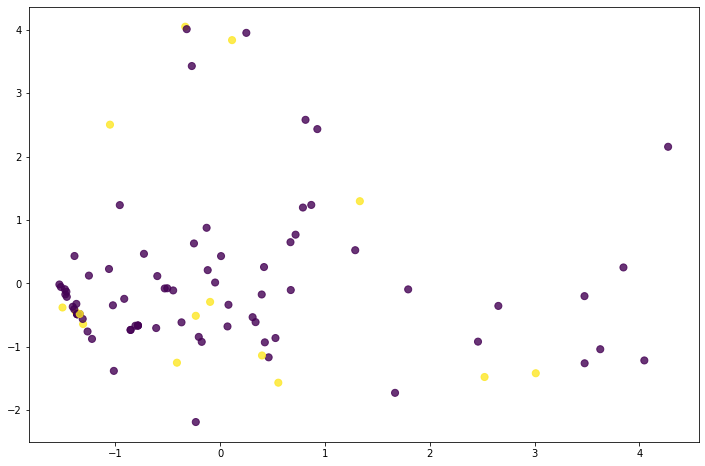

In [719]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)

Make predictions

In [720]:
yhat_test = logit.predict(X_test) 
prediction = list(map(round, yhat_test)) 
prediction = np.array(prediction, dtype=np.int64)

In [721]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('sm_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Make submissions

In [722]:
#upload submission
sm_submission = pd.read_csv("sm_submission.csv")
sm_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Visualise PCA - 2D

In [723]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(891, 7)

In [724]:
np.mean(X),np.std(X)

(1.0822760926280185e-17, 1.0)

In [725]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6']

In [726]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,0.827377,0.737695,-0.566307,0.432793,-0.473674,-0.770005,0.585954
1,-1.566107,-1.355574,0.672875,0.432793,-0.473674,1.522642,-1.942303
2,0.827377,-1.355574,-0.256511,-0.474545,-0.473674,-0.770005,0.585954
3,-1.566107,-1.355574,0.440529,0.432793,-0.473674,1.081748,0.585954
4,0.827377,0.737695,0.440529,-0.474545,-0.473674,-0.725916,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.179063,-0.474545,-0.473674,-0.505469,0.585954
887,-1.566107,-1.355574,-0.798654,-0.474545,-0.473674,0.244050,0.585954
888,0.827377,-1.355574,-0.101614,0.432793,2.008933,-0.064575,0.585954
889,-1.566107,0.737695,-0.256511,-0.474545,-0.473674,0.244050,-1.942303


In [727]:
from sklearn.decomposition import PCA

pca_titanic = PCA(n_components=2)
principalComponents_titanic = pca_titanic.fit_transform(X)

In [728]:
principal_titanic_Df = pd.DataFrame(data = principalComponents_titanic, columns = ['principal component 1', 'principal component 2'])
principal_titanic_Df

,principal component 1,principal component 2
0,-1.398196,0.607192
1,2.692449,-1.114326
2,-0.909372,0.378009
3,1.830372,-0.542242
4,-1.466172,-0.389264
...,...,...
886,-0.778497,-0.545157
887,0.918855,-0.328016
888,0.544684,1.951989
889,0.866267,-1.438057


In [729]:
print('Explained variation per principal component: {}'.format(pca_titanic.explained_variance_ratio_))

Explained variation per principal component: [0.29411091 0.24446384]


<Figure size 432x288 with 0 Axes>

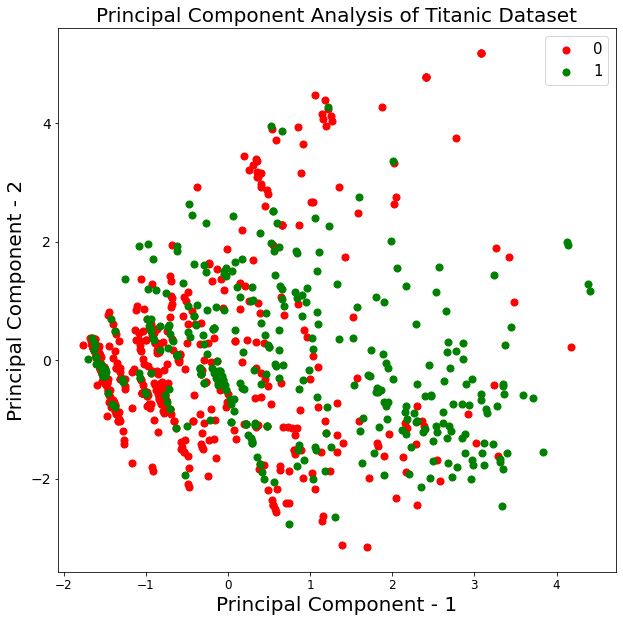

In [730]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Titanic Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_titanic_Df.loc[indicesToKeep, 'principal component 1'], 
                principal_titanic_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

PCA - 3D

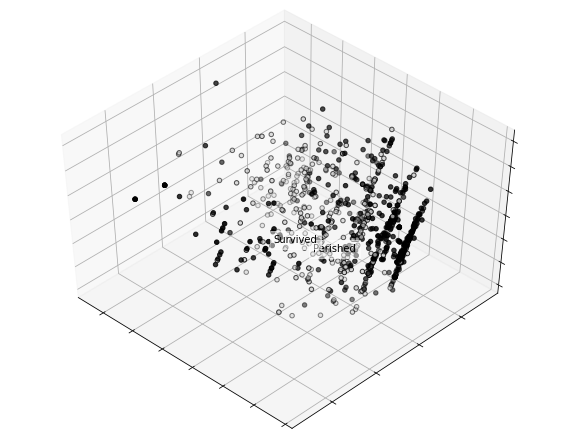

In [731]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Perished', 0), ('Survived', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0, 3, 4, 5, 6, 7]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Chaining PCA and logistic regression

Best parameter (CV score=0.727):
{'logistic__C': 10.0, 'pca__n_components': 3}


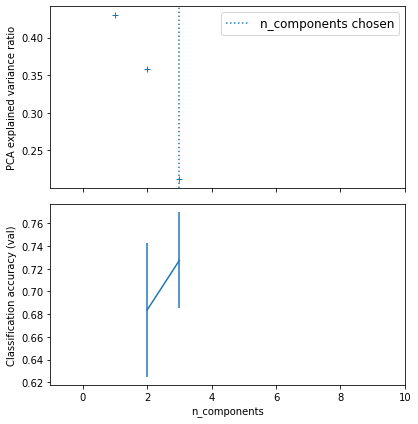

In [732]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=1000)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8],
    'logistic__C': np.logspace(1, 10, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()